<a href="https://colab.research.google.com/github/a-kash-1/Learning_OpenCV/blob/master/Color_Quantization_with_OpenCV_using_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# What is color quantization
## https://www.youtube.com/watch?v=LQST9MITKrw

In [0]:
# Tutorial Link:
## https://www.pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/

In [0]:
# MiniBatchKMeans is substantially faster than KMeans although centroids may not be that stable
# beacause the former operates on mini batches of the dataset, whereas latter operates on the entire
# population of data, thus making mean calcultation as well a centroid update loop, much slower
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import cv2

In [0]:
# load the image and grab its width and height

def quant(image, clusters):
  (h, w) = image.shape[:2]
  # convert the image from rgb color space to the L*a*b
  # color space -- since we will be clustering using k-means
  # which is based on euclidean distance, we'll use the 
  # L*a*b color space where the euclidean distance implies 
  # perceptual meaning - this is not the case with RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

  # reshape the image into a feature vector so that k-means can be applied
  image = image.reshape((image.shape[0]* image.shape[1], 3))

  # apply k-means using the specified number of clusters and 
  # then create the quantized image based on the predictions
  clt = MiniBatchKMeans(n_clusters = clusters, random_state = 0)
  # The next line does something extremely important:
  # predicting which 'quantized' color each pixel is going to be.
  # This is handled by determining which centroid the input pixel is closest to
  labels = clt.fit_predict(image)
  quant = clt.cluster_centers_.astype('uint8')[labels]

  # reshape the feature vectors to images
  quant = quant.reshape((h, w, 3))
  image = image.reshape((h, w, 3))

  # convert from Lab to RGB
  quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
  image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
  return(np.hstack([image, quant]))

In [0]:
image = cv2.imread('image.jpg')

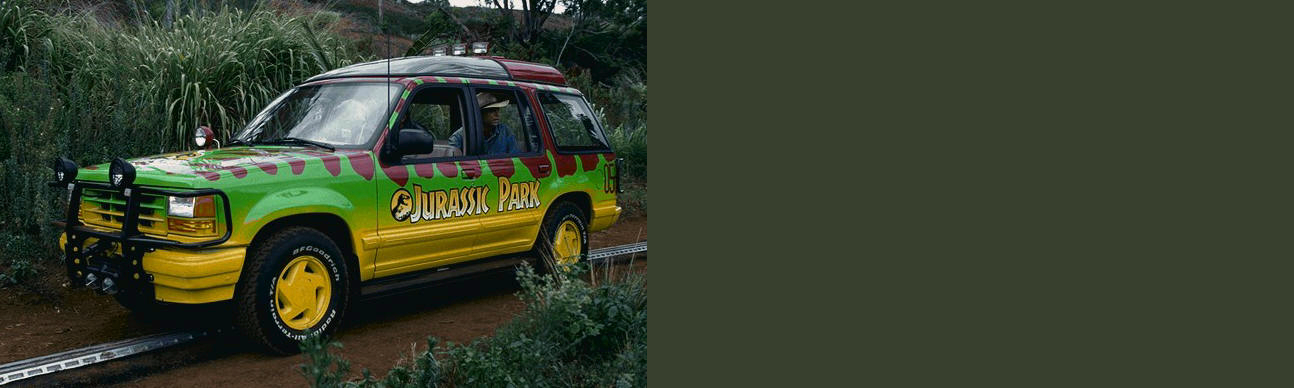

In [58]:
# display the images  with clusters = 1
from google.colab.patches import cv2_imshow
cv2_imshow(quant(image, 1))

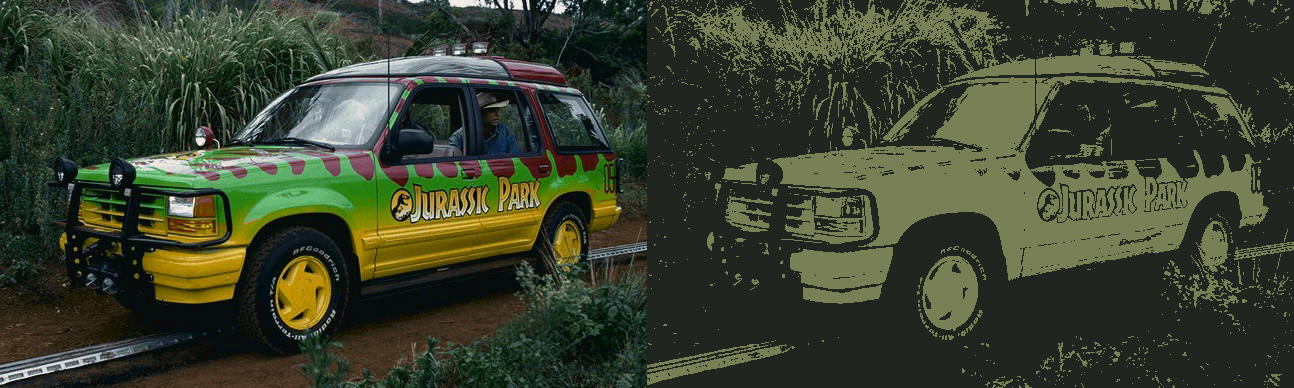

In [59]:
# display the images  with clusters = 2
# notice the greenish tinge
cv2_imshow(quant(image, 2))

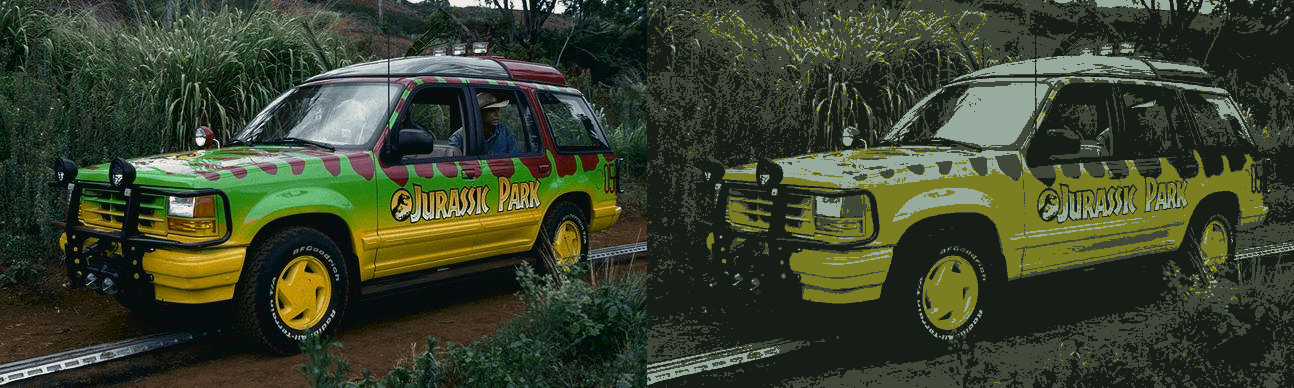

In [60]:
# display the images  with clusters = 4
cv2_imshow(quant(image, 4))

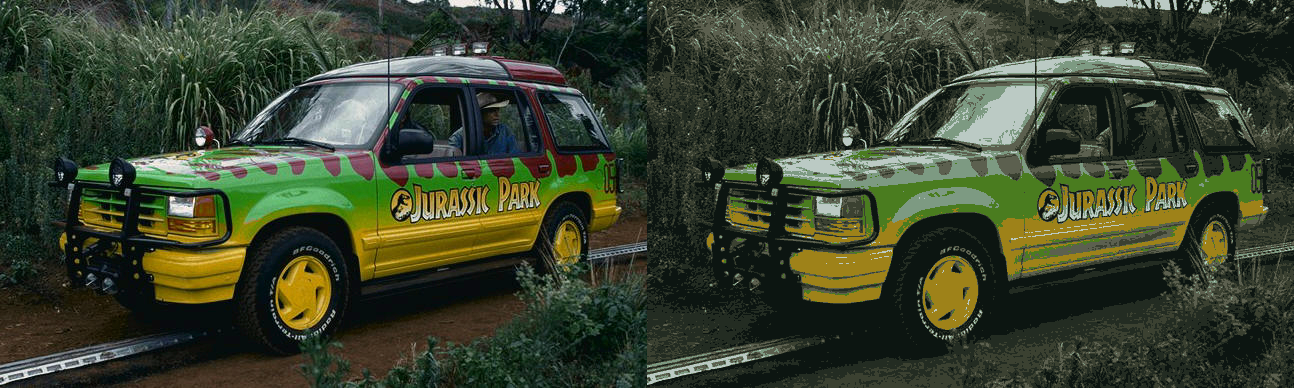

In [61]:
# display the images  with clusters = 8
cv2_imshow(quant(image, 8))

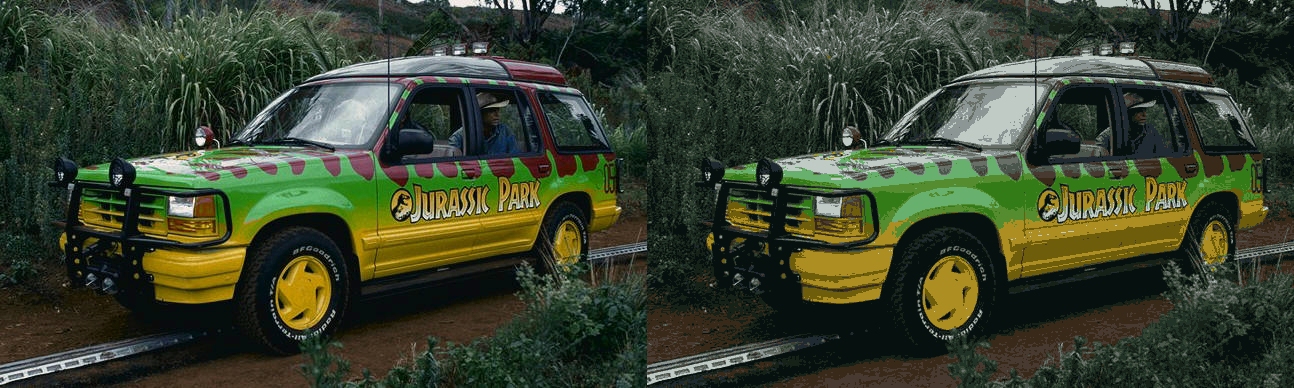

In [62]:
# display the images  with clusters = 16
cv2_imshow(quant(image, 16))

In [0]:
## Conclusion: It only takes a few colors ~ 16 to create a good representation of the image